# Bayesian experimental design for Kepler-51

Kepler-51 is a very important system! Suppose we would like to make a follow-up measurement on one of the planets; say Kepler-51b. How would we know the optimal time(s) to observe to decreaes uncertainties on the dynamical masses in the system? Because the sampling on TTV curves is often sparse and non-uniform, it can be difficult to quantify from first principles how much information you gain on the dynamical masses at any given epoch.

Here, we use Bayesian experimental design to solve this problem. Largely following Goldberg et al. (2018), we can *simulate* what the posteriors look like after a follow-up measurement is taken by rejection sampling our original posteriors. We can then quantify the difference between the old and new posteriors using the Kullback-Leibler Divergence, and use this as a metric to assess the expected information gain at each epoch. We can repeat this procedure a bunch of times to get a sense of a mean and variance on the expected information gain at each epoch as well.

ttvnest has a Bayesian experimental design module called 'followup' that does just that. Let's use it!

In [4]:
%matplotlib inline
import ttvnest
import numpy as np

kepler51 = ttvnest.io_utils.load_results('kepler_51.p')

Let's check out the posterior summary and make plots:

Summary (middle 95 percentile): 
$M_1/M_\star/3\times10^{-6}$: $5.810793^{+4.096672}_{-3.676496}$
$P_1\ [\mathrm{days}]$: $45.154569^{+0.000333}_{-0.000352}$
$\sqrt{e}_1\cos(\omega_1)$: $-0.060879^{+0.069008}_{-0.0634}$
$\sqrt{e}_1\sin(\omega_1)$: $-0.139774^{+0.082858}_{-0.057323}$
$T_{0,1}\ [\mathrm{days}]$: $2.110316^{+0.000944}_{-0.00102}$
$M_2/M_\star/3\times10^{-6}$: $4.443571^{+0.871546}_{-0.758678}$
$P_2\ [\mathrm{days}]$: $85.317561^{+0.005167}_{-0.005031}$
$\sqrt{e}_2\cos(\omega_2)$: $0.057908^{+0.038311}_{-0.076143}$
$\sqrt{e}_2\sin(\omega_2)$: $-0.058693^{+0.092786}_{-0.071857}$
$T_{0,2}\ [\mathrm{days}]$: $53.005658^{+0.005816}_{-0.005257}$
$M_3/M_\star/3\times10^{-6}$: $5.767087^{+2.150886}_{-1.801322}$
$P_3\ [\mathrm{days}]$: $130.192643^{+0.004917}_{-0.003749}$
$\sqrt{e}_3\cos(\omega_3)$: $0.007374^{+0.059565}_{-0.070856}$
$\sqrt{e}_3\sin(\omega_3)$: $-0.052944^{+0.078813}_{-0.062119}$
$T_{0,3}\ [\mathrm{days}]$: $55.026887^{+0.001529}_{-0.001634}$


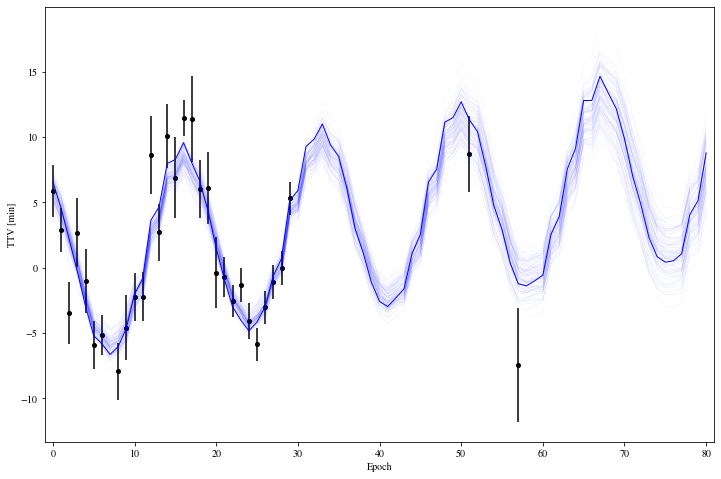

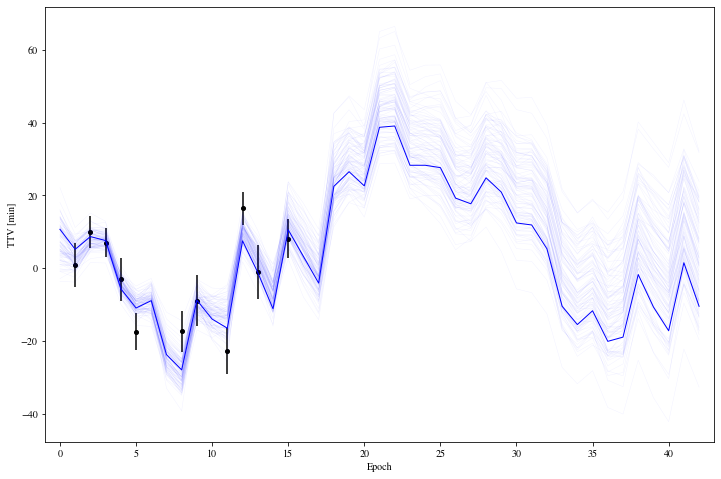

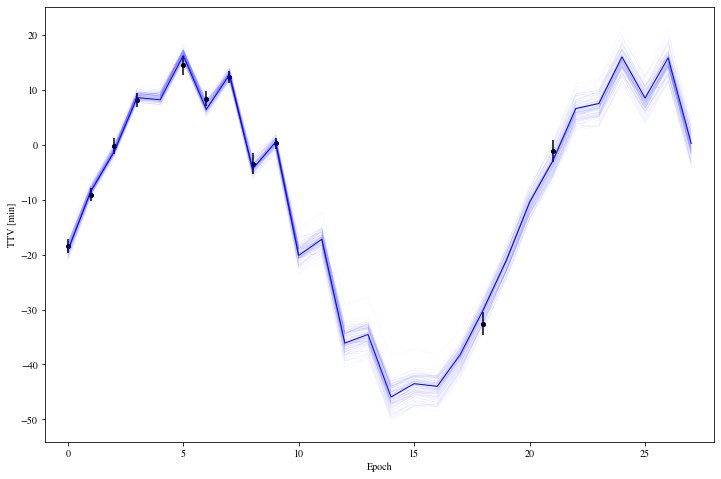

In [5]:
kepler51.posterior_summary()
ttvnest.plot_utils.plot_results(kepler51, uncertainty_curves = 100, sim_length = 365.25*10)

Now, let's do some Bayesian experimental design! 

In [6]:
measurement_uncertainty = 4./1440 #about as good as Kepler
measured_planet = 2 #one-indexed

info = ttvnest.followup.calculate_information_timeseries(
        kepler51, measurement_uncertainty, measured_planet)

  0%|          | 24/103403 [00:00<07:25, 231.97it/s]

Propogating all models in posterior forward to time 7305.0...


  0%|          | 0/86 [00:00<?, ?it/s]

Calculating the Kullback-Leibler Divergence distribution at each epoch...


100%|██████████| 86/86 [44:10<00:00, 30.50s/it]


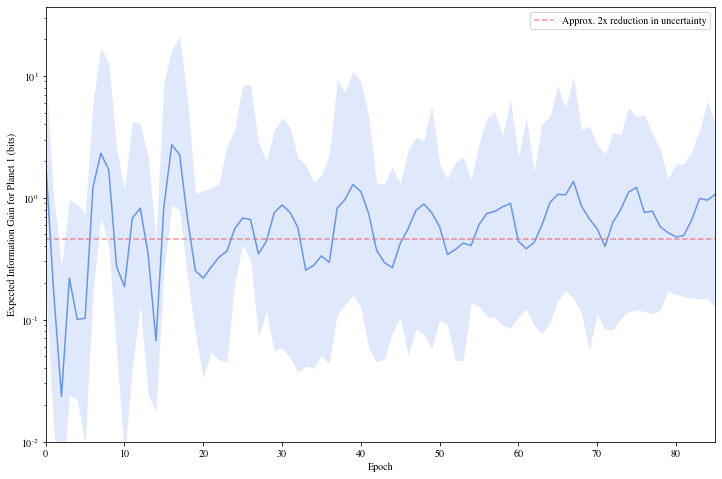

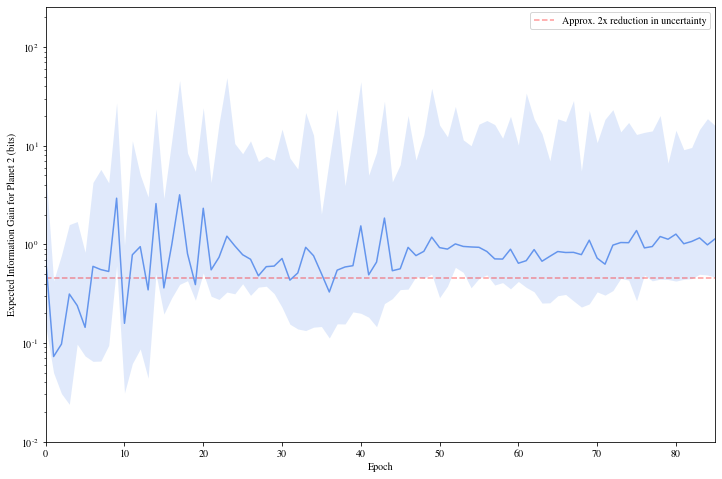

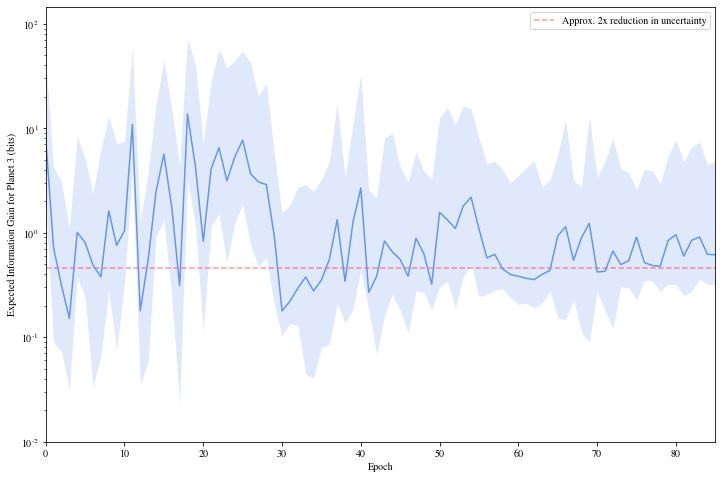

In [7]:
ttvnest.plot_utils.plot_information_timeseries(info)

This is a great test case for Bayesian experimental design. Remember that we're measuring Planet 2 here (that is, Kepler-51c). It looks like no matter where we put down our measurement, we'll pretty much always get a large improvement in the mass of Kepler-51c. (If you're wondering "shouldn't TTVs improve the masses of the perturbing planets?", I believe the answer is that the single measurement here nails down the period of this planet, which helps with its mass). However, there are better and worse times to plan our measurement for improving the masses of Kepler-51b and d. By measuring at epoch 40 or epoch 65 of Kepler-51b, you'd be much better positioned to improve the masses of all three planets. Conversely, measuring at epoch 50 wouldn't be as useful.